In [1]:
import pandas as pd

In [19]:

dados = pd.read_csv('/content/drive/MyDrive/Bootcamp_ALURA/Portifolio-Alura/Diário/Módulo 4/Bases de Dados/A145400189_28_143_208.csv', encoding= 'ISO-8859-1', delimiter=';', skiprows= 3, skipfooter= 17, engine = 'python')

In [20]:
dados = dados.drop('Total', axis=1)

In [21]:
dados.dtypes

Ano Diagnóstico    int64
Jan                int64
Fev                int64
Mar                int64
Abr                int64
Mai                int64
Jun                int64
Jul                int64
Ago                int64
Set                int64
Out                int64
Nov                int64
Dez                int64
dtype: object

In [22]:
dados

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541
5,2006,7385,6687,8132,6804,7593,6984,7101,7722,6793,7005,6674,6151
6,2007,7342,6204,8115,7266,7368,6591,7184,7564,6712,7465,6695,6094
7,2008,7355,6646,7278,7612,6895,6929,7688,7797,7631,7564,6799,6574
8,2009,7113,6452,8146,7514,7168,6702,7443,7368,7388,7285,7016,6723
9,2010,6912,6403,8308,7049,6973,6621,7128,7389,7165,7210,7047,7176


In [23]:
dados_melt = dados.melt(id_vars= ['Ano Diagnóstico'])

In [24]:
dados_melt.head()
dados_melt['Ano Diagnóstico'] = dados_melt['Ano Diagnóstico'].astype(str)

In [25]:
dados_melt

,Ano Diagnóstico,variable,value
0,2001,Jan,8088
1,2002,Jan,8013
2,2003,Jan,8115
3,2004,Jan,7574
4,2005,Jan,7432
...,...,...,...
223,2015,Dez,6844
224,2016,Dez,6672
225,2017,Dez,7020
226,2018,Dez,6900


In [26]:
d = {'Jan': '01', 'Fev': '02', 'Mar': '03', 'Abr': '04','Mai': '05', 'Jun': '06', 'Jul': '07', 'Ago': '08', 'Set': '09','Out': '10', 'Nov': '11', 'Dez': '12' }

In [28]:
dados_melt['ANOMES'] = dados_melt['Ano Diagnóstico'] + dados_melt['variable'].map(d) 

In [30]:
dados_melt

,Ano Diagnóstico,variable,value,MES,ANOMES
0,2001,Jan,8088,200101,200101
1,2002,Jan,8013,200201,200201
2,2003,Jan,8115,200301,200301
3,2004,Jan,7574,200401,200401
4,2005,Jan,7432,200501,200501
...,...,...,...,...,...
223,2015,Dez,6844,201512,201512
224,2016,Dez,6672,201612,201612
225,2017,Dez,7020,201712,201712
226,2018,Dez,6900,201812,201812


In [53]:
dados_final = dados_melt.drop(['Ano Diagnóstico','variable' ], axis = 1)

In [54]:
dados_final = dados_final.rename(columns={"value": "CASOS"})

In [55]:
dados_final = dados_final.sort_values(by=['ANOMES'])

In [56]:
import matplotlib.pyplot as plt

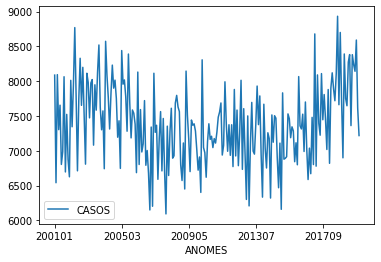

In [57]:
dados_final.plot(x = 'ANOMES', y = 'CASOS' )

In [58]:
dados_final['ANOMES'] = pd.to_datetime(dados_final['ANOMES'], format= '%Y%m')

In [59]:
dados_final

,CASOS,MES,ANOMES
0,8088,200101,2001-01-01
19,6542,200102,2001-02-01
38,8095,200103,2001-03-01
57,7305,200104,2001-04-01
76,7656,200105,2001-05-01
...,...,...,...
151,8239,201908,2019-08-01
170,8143,201909,2019-09-01
189,8592,201910,2019-10-01
208,7615,201911,2019-11-01
